In [42]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np                       

In [43]:
df=pd.read_csv('data (1).csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [44]:
print(df.shape)
print(df.columns)

(10692, 13)
Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [45]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [46]:
# Seperating continuous and categorical columns
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:              
        if df[column].nunique() < 50:      
                                                
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)        

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [47]:
# Defining a function for information of categorical column.
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column

## Analysis of Cities:

In [48]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo


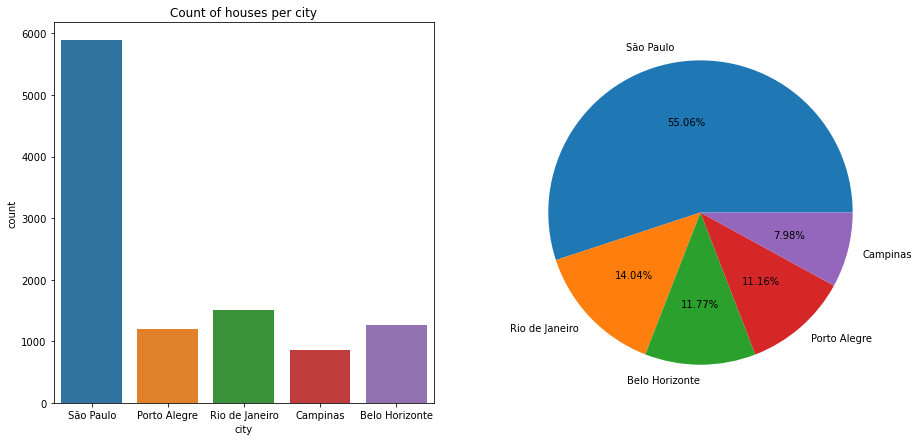

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses per city")                
percentage = df["city"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### Majority of the houses (i.e. 55%) are there in São Paulo. Therefore we can  say that it is the best city in terms of availability.

## Analysis of rooms:

In [50]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3


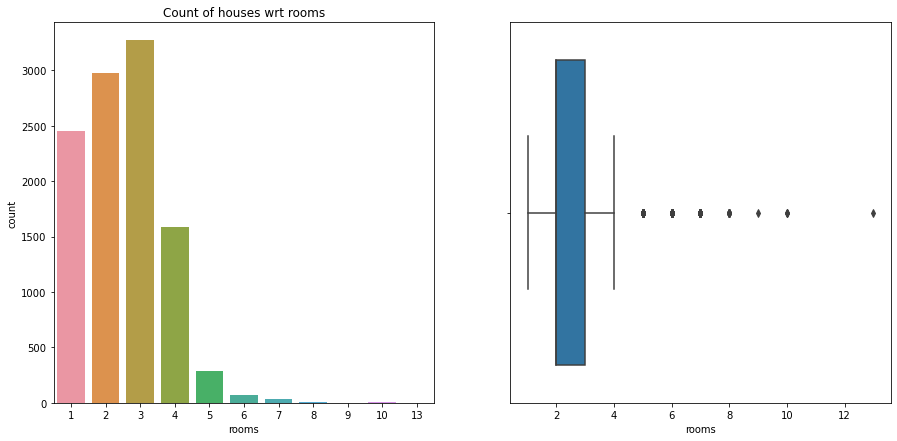

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt rooms")                
percentage = df["rooms"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["rooms"], ax = ax[0])
sns.boxplot(x= df["rooms"], ax = ax[1])
plt.show()

Here we can clearly see that the houses with more than 4 rooms are outliers. Therefore we will not consider those houses as it can lead to wrong analysis.

In [52]:
idx=df[df.rooms>4].index
df=df.drop(labels= idx, axis=0)

## Analysing rooms again:

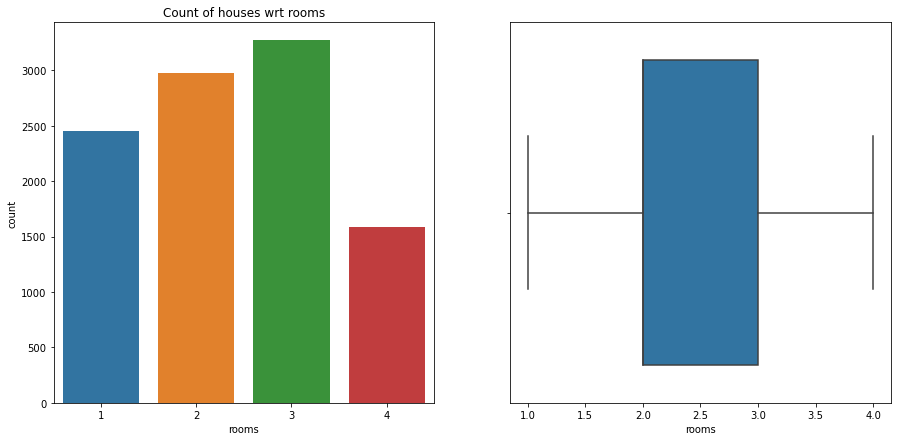

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt rooms")                
percentage = df["rooms"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["rooms"], ax = ax[0])
sns.boxplot(x= df["rooms"], ax = ax[1])
plt.show()

## Analysing bathrooms:

In [54]:
info_of_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  9  7  8 10]
Mode of bathroom is 1


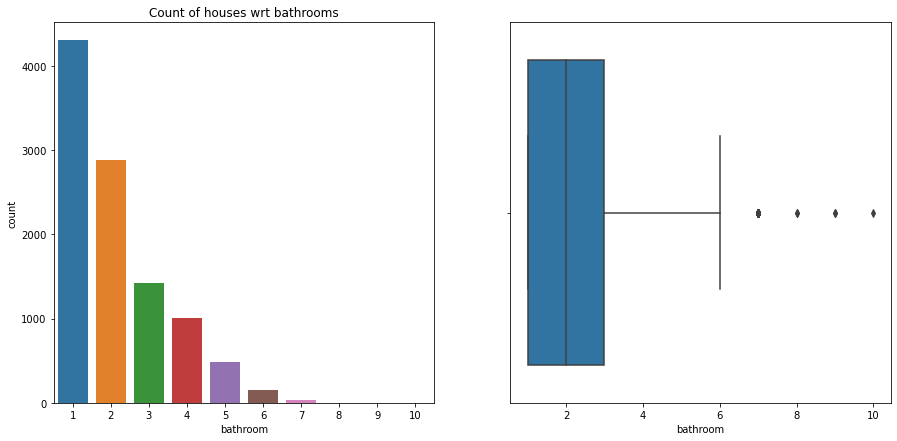

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt bathrooms")                
percentage = df["bathroom"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["bathroom"], ax = ax[0])
sns.boxplot(x= df["bathroom"], ax = ax[1])
plt.show()

Here we can clearly see that the houses with more than 6 bathrooms are outliers. Therefore we will not consider those houses as it can lead to wrong analysis.

In [56]:
idx1=df[df.bathroom>6].index
df=df.drop(labels= idx1, axis=0)

## Analysing bathrooms again:

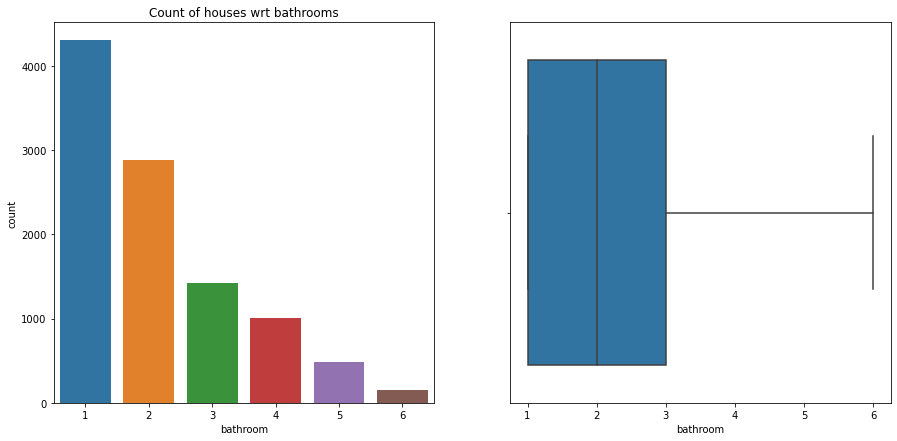

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt bathrooms")                
percentage = df["bathroom"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["bathroom"], ax = ax[0])
sns.boxplot(x= df["bathroom"], ax = ax[1])
plt.show()

## Analysing Parking spaces:

In [58]:
info_of_cat('parking spaces')

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1


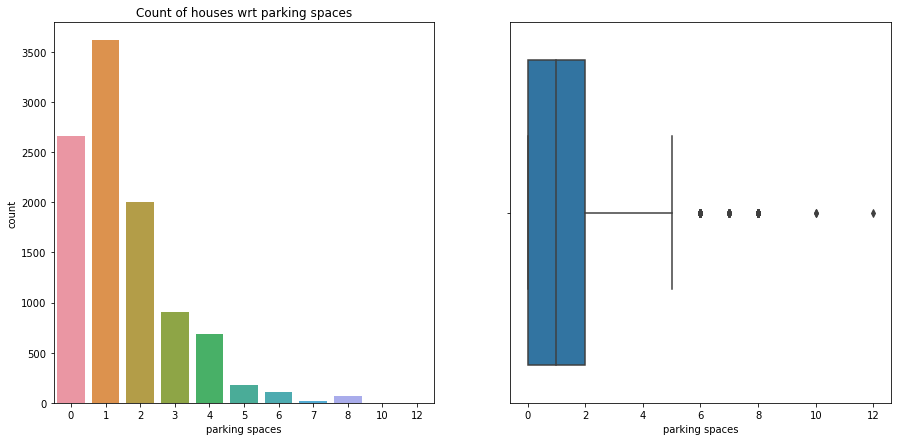

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt parking spaces")                
percentage = df["parking spaces"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["parking spaces"], ax = ax[0])
sns.boxplot(x= df["parking spaces"], ax = ax[1])
plt.show()

Here we can clearly see that the houses with more than 5 parking spaces are outliers. Therefore we will not consider those houses as it can lead to wrong analysis.

In [60]:
idx2=df[df['parking spaces']>5].index
df=df.drop(labels= idx2, axis=0)

In [61]:
df.shape

(10040, 13)

## Analysing Parking spaces again:

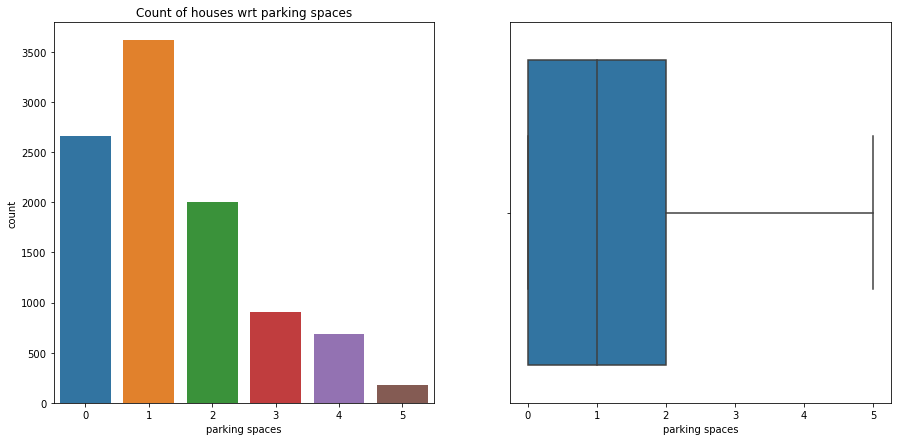

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt parking spaces")                
percentage = df["parking spaces"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["parking spaces"], ax = ax[0])
sns.boxplot(x= df["parking spaces"], ax = ax[1])
plt.show()

## Analysing floors:

In [63]:
info_of_cat('floor')

Unique values in floor are: [  7  20   6   2   1   4   3  10  11  24   9   8  17  18   0   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0


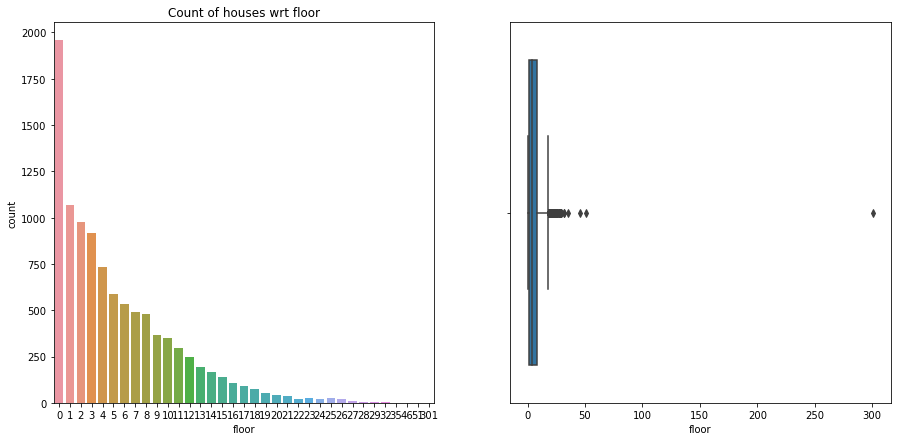

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt floor")                
percentage = df["floor"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["floor"], ax = ax[0])
sns.boxplot(x= df["floor"], ax = ax[1])
plt.show()

Here, we would not perform outlier treatment because 
1. we aren't considering floor as a major factor for considering a house.
2. The number of outliers are too much.

## Analysing houses with animals:

In [65]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept


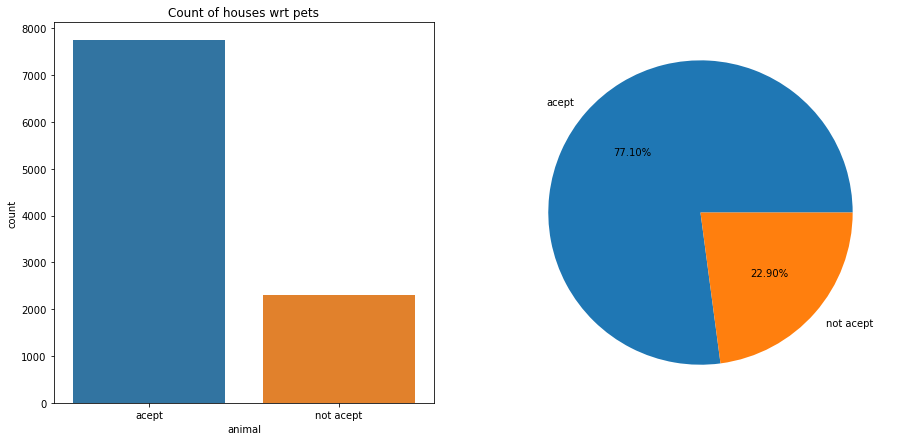

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt pets")                
percentage = df["animal"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### Majority of houses are accepting pets.

## Analysing Furniture:

In [67]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished


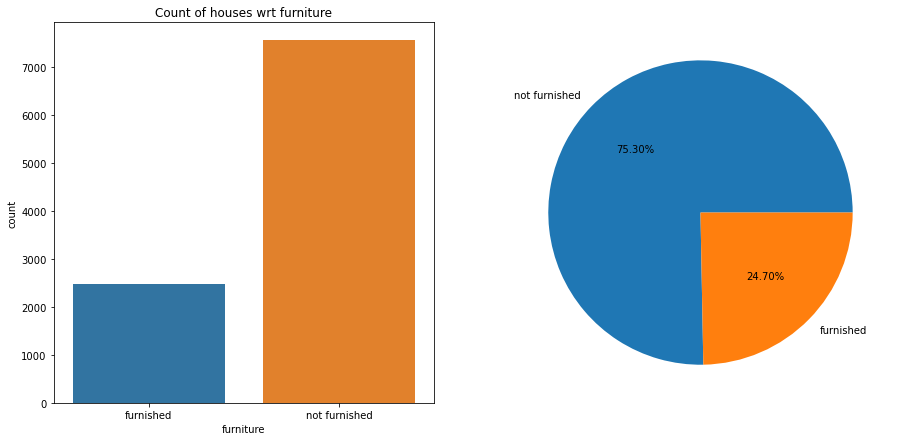

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of houses wrt furniture")                
percentage = df["furniture"].value_counts()        
labels = list(percentage.index) 

sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### Majority of houses are without furniture

# Analysis of Continuous Columns

In [69]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")

## Analysis of Area:

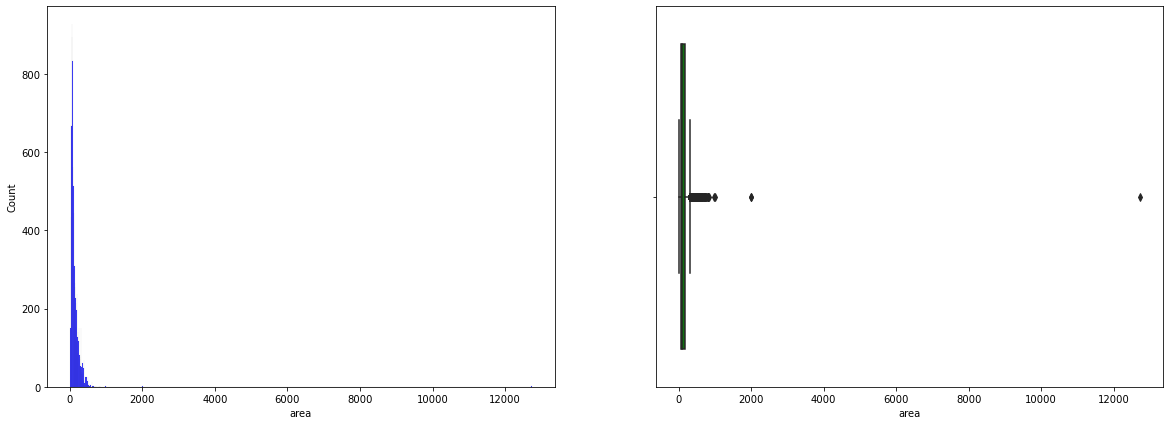

In [70]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["area"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["area"], ax = ax[1], color = "green") 
plt.show()

In [71]:
# Defining function to remove outliers
def myoutliers(df, col):
    Q3=np.quantile(df[col], 0.75)
    Q1=np.quantile(df[col], 0.25)
    IQR= Q3-Q1
    
    global mylist
    global ind
    
    lower_range = Q1- 1.5*IQR
    upper_range = Q3+ 1.5*IQR
    
    print("The lower limit of ",col,"is ",lower_range)
    print("The upper limit of ",col,"is ",upper_range)
    
    ind=df[(df[col]<lower_range)|(df[col]>upper_range)].index
    mylist= [x for x in df[col] if ((x < lower_range)|(x > upper_range))]
    print('Total outliers in ',col,'are',len(mylist))

In [72]:
# doing outlier treatment for area
myoutliers(df, 'area')
df=df.drop(labels= ind, axis=0)

The lower limit of  area is  -102.5
The upper limit of  area is  317.5
Total outliers in  area are 568


## Analysing Area again:

In [73]:
info_of_numerical("area")

The mean of the area is 105.45988175675676
The median of the area is 80.0
The mode of the area is 50
The standard deviation of the area is 70.43148966974407


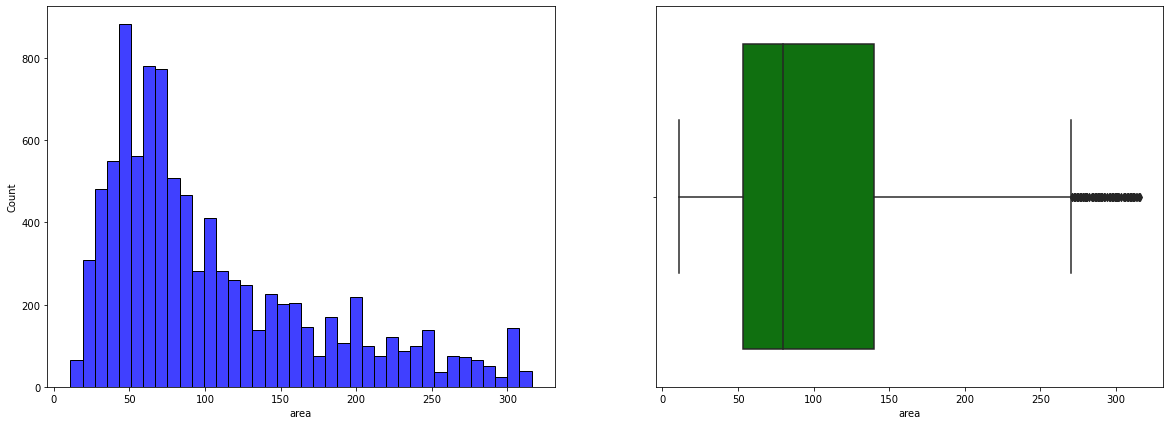

In [74]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["area"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["area"], ax = ax[1], color = "green") 
plt.show()

## Analysing hoa (R$)

In [75]:
info_of_numerical('hoa (R$)')

The mean of the hoa (R$) is 1126.4174408783783
The median of the hoa (R$) is 586.5
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 16394.51564657402


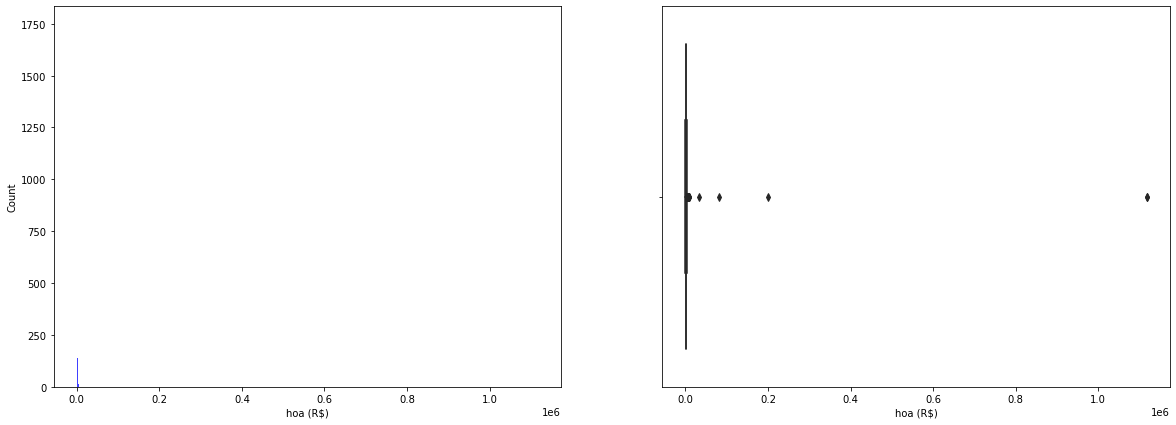

In [76]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["hoa (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["hoa (R$)"], ax = ax[1], color = "green") 
plt.show()

We are getting such graph because of unsually extreme values.

In [77]:
myoutliers(df, 'hoa (R$)')
df=df.drop(labels= ind, axis=0)

The lower limit of  hoa (R$) is  -1150.0
The upper limit of  hoa (R$) is  2610.0
Total outliers in  hoa (R$) are 528


# Analysing hoa (R$) again:

In [78]:
info_of_numerical('hoa (R$)')

The mean of the hoa (R$) is 707.8685152057245
The median of the hoa (R$) is 550.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 643.7113140007438


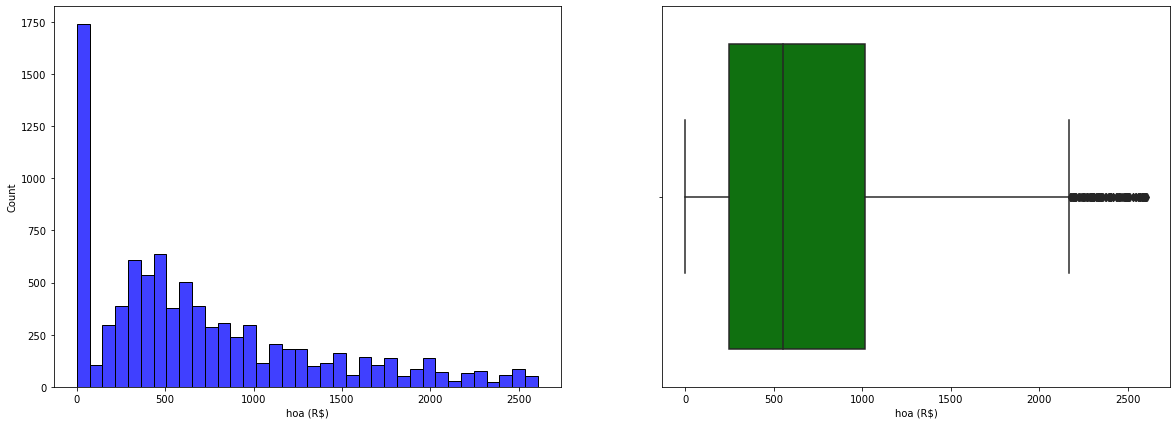

In [79]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["hoa (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["hoa (R$)"], ax = ax[1], color = "green") 
plt.show()

## Analysing rent amount (R$)

In [80]:
info_of_numerical('rent amount (R$)')

The mean of the rent amount (R$) is 3012.9159212880145
The median of the rent amount (R$) is 2200.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 2440.484542428136


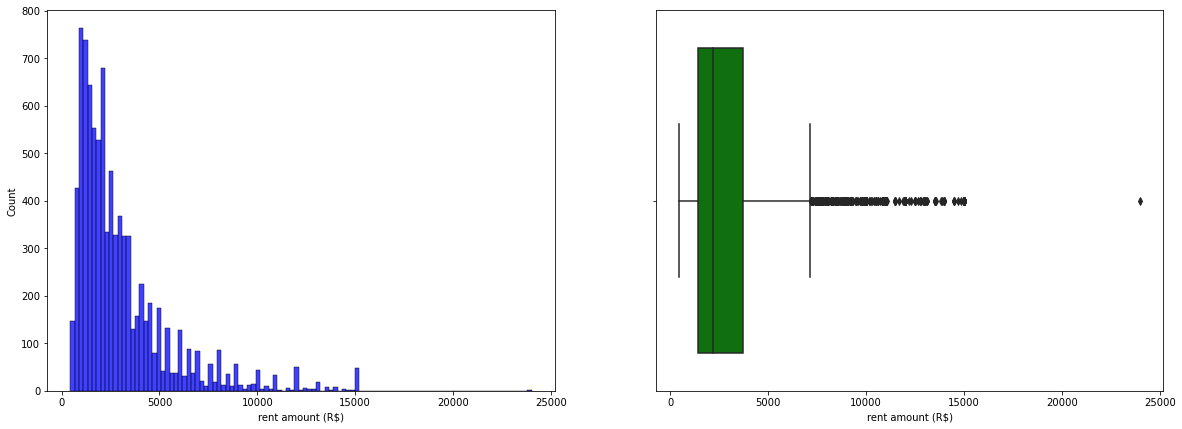

In [81]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["rent amount (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["rent amount (R$)"], ax = ax[1], color = "green") 
plt.show()

In [82]:
# Outlier treatment
myoutliers(df, 'rent amount (R$)')
df=df.drop(labels= ind, axis=0)

The lower limit of  rent amount (R$) is  -2050.0
The upper limit of  rent amount (R$) is  7150.0
Total outliers in  rent amount (R$) are 596


# Analysing rent amount again

In [83]:
info_of_numerical('rent amount (R$)')

The mean of the rent amount (R$) is 2513.1677048394827
The median of the rent amount (R$) is 2100.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 1491.8813579665582


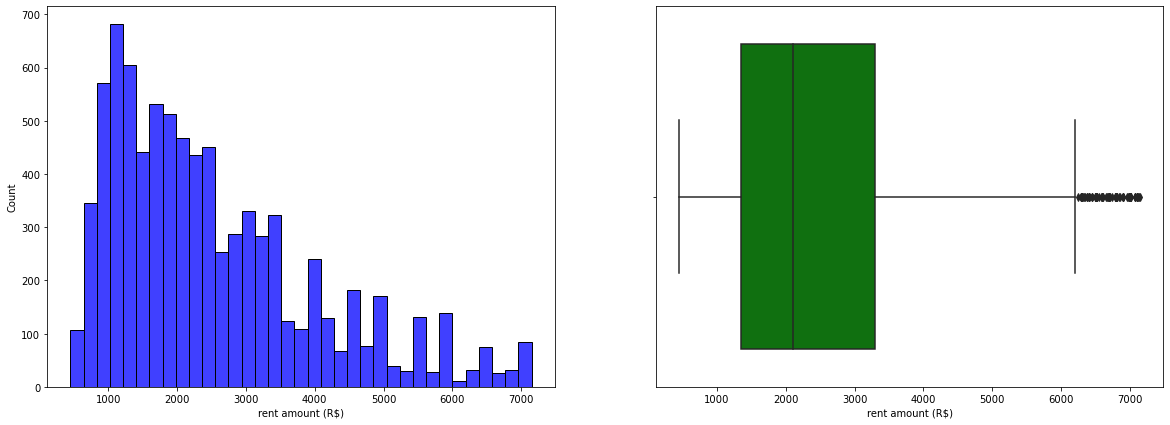

In [84]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["rent amount (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["rent amount (R$)"], ax = ax[1], color = "green") 
plt.show()

# Analysing Property Tax:

In [86]:
info_of_numerical('property tax (R$)')

The mean of the property tax (R$) is 200.2522759942501
The median of the property tax (R$) is 84.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3453.2466533494066


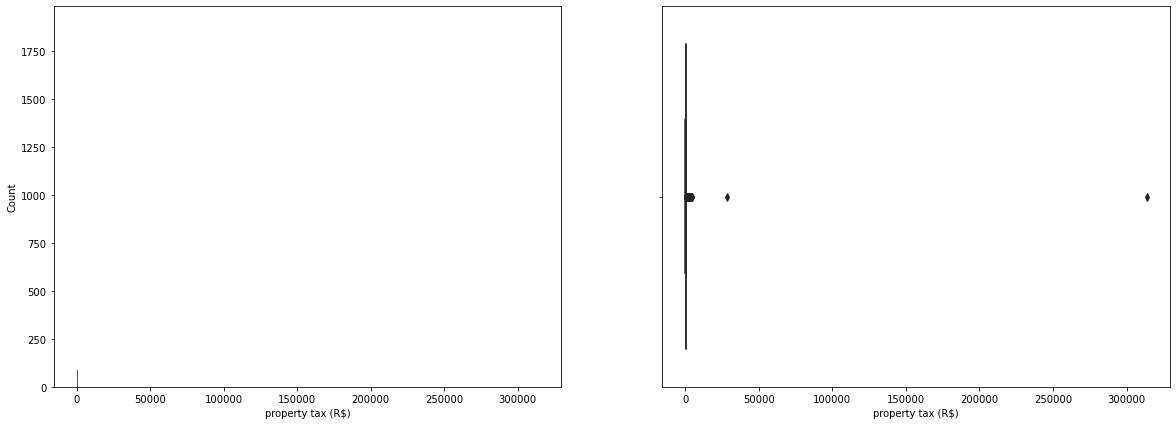

In [87]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["property tax (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["property tax (R$)"], ax = ax[1], color = "green") 
plt.show()

In [88]:
# Outlier Treatment
myoutliers(df, 'property tax (R$)')
df=df.drop(labels= ind, axis=0)

The lower limit of  property tax (R$) is  -251.0
The upper limit of  property tax (R$) is  485.0
Total outliers in  property tax (R$) are 589


# Analysing property task again:

In [89]:
info_of_numerical('property tax (R$)')

The mean of the property tax (R$) is 112.66503415388581
The median of the property tax (R$) is 77.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 115.07887855164498


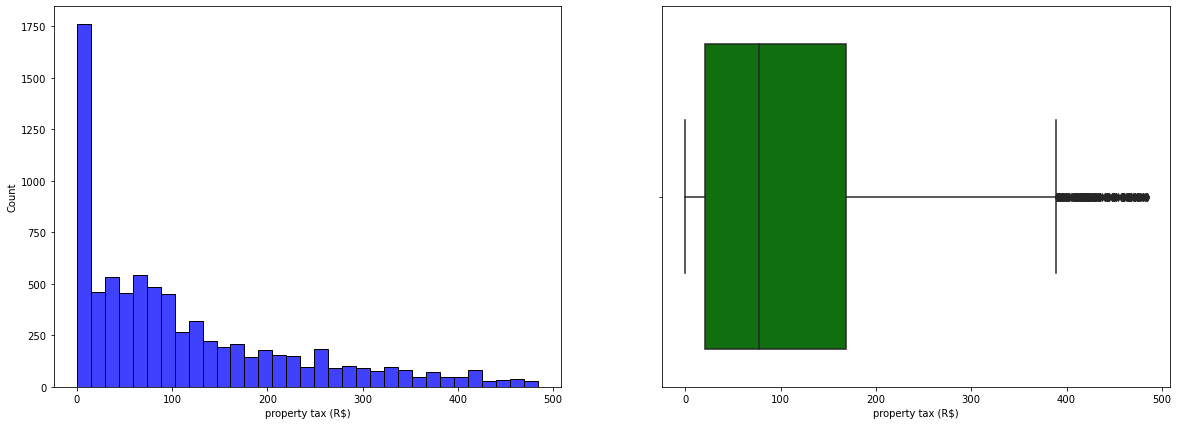

In [90]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["property tax (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["property tax (R$)"], ax = ax[1], color = "green") 
plt.show()

# Analysing Fire Insurance:

In [91]:
info_of_numerical('fire insurance (R$)')

The mean of the fire insurance (R$) is 31.935429823430855
The median of the fire insurance (R$) is 26.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 18.77702109107274


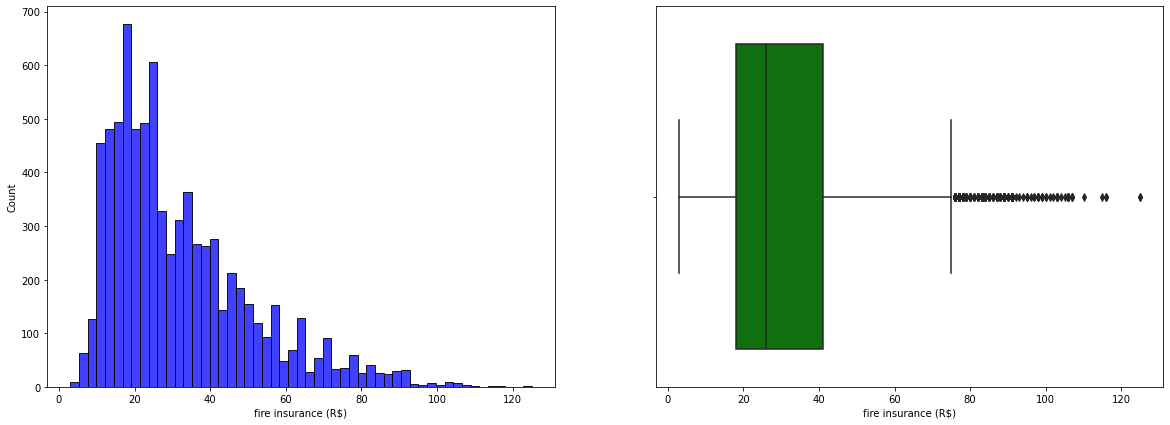

In [92]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["fire insurance (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["fire insurance (R$)"], ax = ax[1], color = "green") 
plt.show()

In [93]:
# Outlier Treatment
myoutliers(df, 'fire insurance (R$)')
df=df.drop(labels= ind, axis=0)

The lower limit of  fire insurance (R$) is  -16.5
The upper limit of  fire insurance (R$) is  75.5
Total outliers in  fire insurance (R$) are 301


# Analysing Fire Insurance again:

In [94]:
info_of_numerical('fire insurance (R$)')

The mean of the fire insurance (R$) is 29.755430410297667
The median of the fire insurance (R$) is 26.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 15.521612824485883


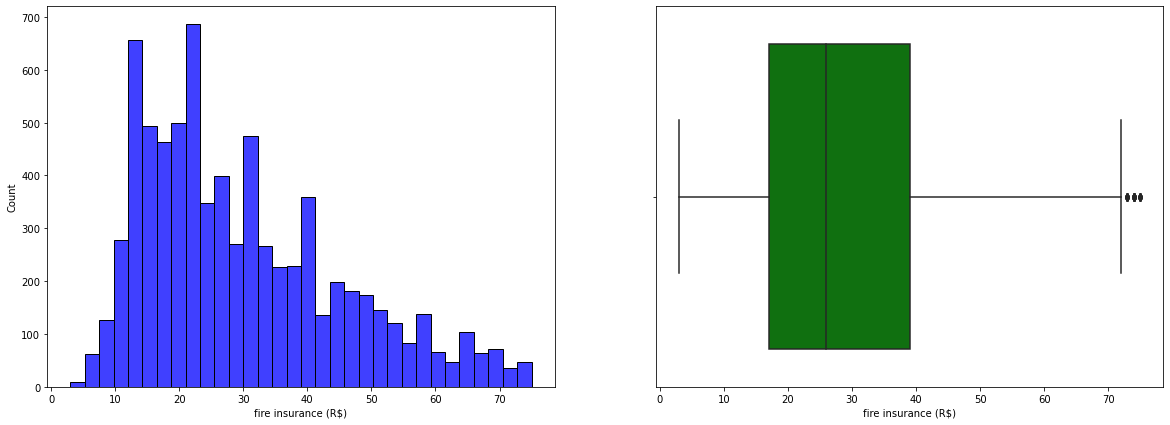

In [95]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["fire insurance (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["fire insurance (R$)"], ax = ax[1], color = "green") 
plt.show()

# Analysing total amount:

In [97]:
info_of_numerical('total (R$)')

The mean of the total (R$) is 2928.4804237060875
The median of the total (R$) is 2586.0
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 1532.2382358774248


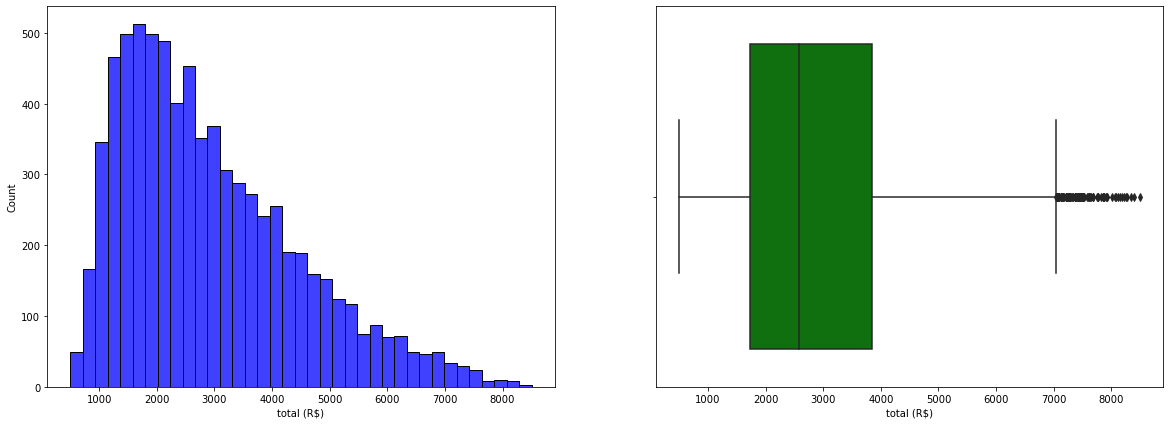

In [98]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["total (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["total (R$)"], ax = ax[1], color = "green") 
plt.show()

In [100]:
# Outlier Treatment
myoutliers(df, 'total (R$)')
df=df.drop(labels= ind, axis=0)

The lower limit of  total (R$) is  -1456.0
The upper limit of  total (R$) is  7038.0
Total outliers in  total (R$) are 106


# Analysing Total again:

In [102]:
info_of_numerical('total (R$)')

The mean of the total (R$) is 2862.8257616974975
The median of the total (R$) is 2561.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 1440.9972742191435


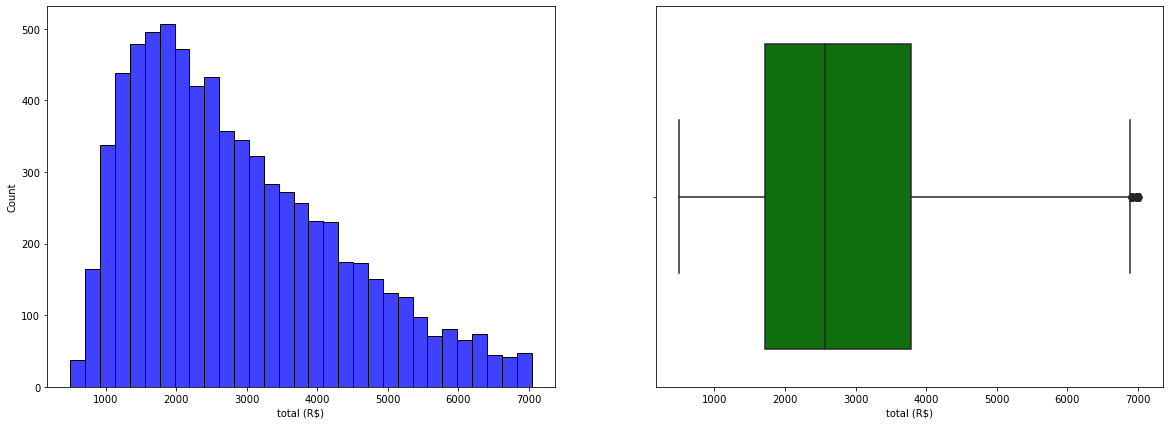

In [103]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["total (R$)"], ax =ax[0], color = "blue") 
sns.boxplot(x = df["total (R$)"], ax = ax[1], color = "green") 
plt.show()

# Bivariate Analysis:

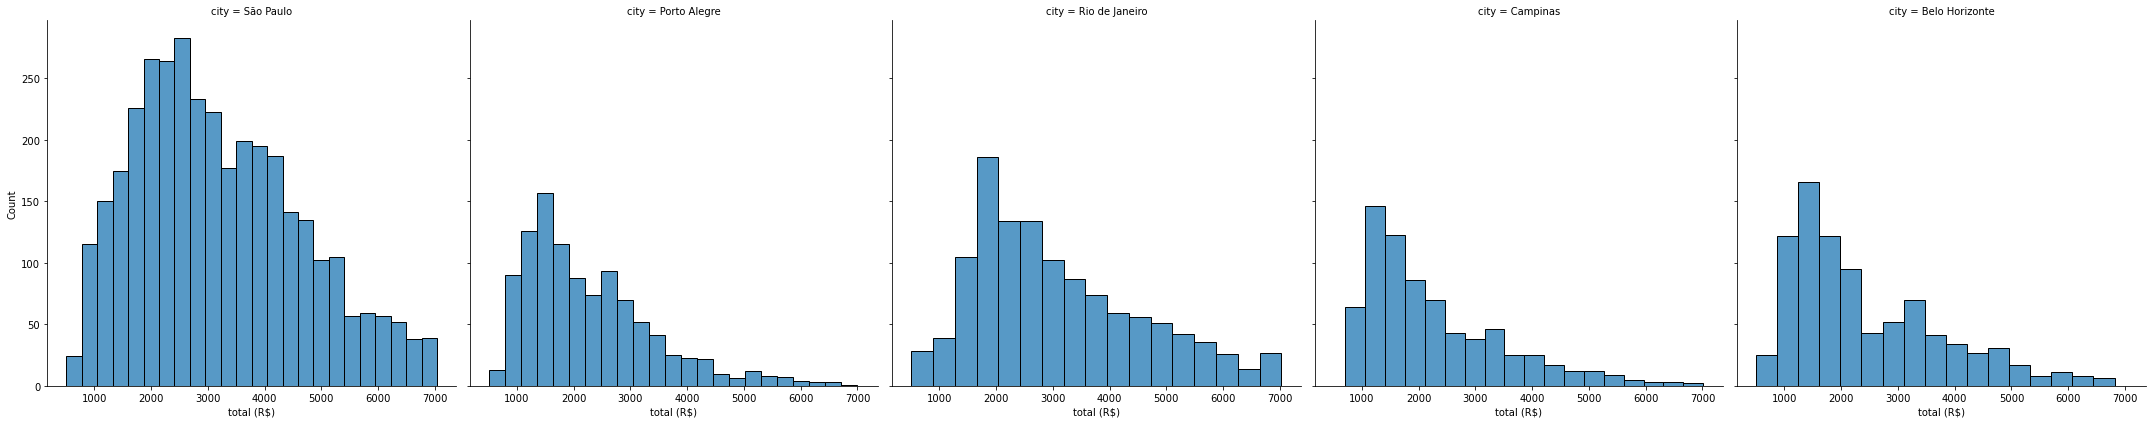

In [106]:
# Analysis of Total ownership cost Vs City
g=sns.FacetGrid(df, col='city',height=6)
g.map(sns.histplot, 'total (R$)')
plt.show()

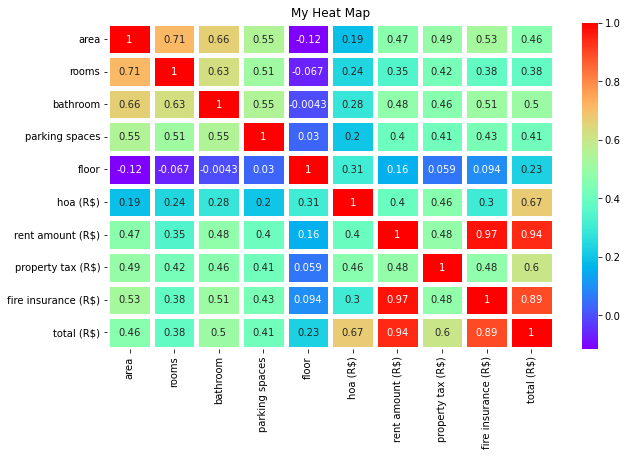

In [107]:
# Analysing Correlation of all the columns
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

As we can see here, there is a direct correlation between:
1. Rent amount and total
2. Rent amount and fire insurance
3. Fire insurance and total